In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import statsmodels.formula.api as smf

from plotnine import *
from mizani.formatters import percent_format
from joblib import Parallel, delayed, cpu_count
from itertools import product
from dateutil.relativedelta import relativedelta

In [3]:
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

# Prepare accounting data with a 'year' column for merging
comp_vn = (pd.read_sql_query(
    sql="SELECT symbol, datadate, icb_name_vi FROM comp_vn",
    con=tidy_finance,
    parse_dates={"datadate"})
  .assign(year=lambda x: x["datadate"].dt.year)
  .dropna()
)

# Ensure prices_monthly has a 'year' column and is merged correctly
prices_monthly = (pd.read_sql_query(
    sql="SELECT symbol, date, ret_excess FROM prices_monthly",
    con=tidy_finance,
    parse_dates={"date"})
  .assign(year=lambda x: x["date"].dt.year)
)

factors_ff3_monthly = pd.read_sql_query(
  sql="SELECT date, mkt_excess FROM factors_ff3_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)

prices_monthly = (prices_monthly
  .merge(factors_ff3_monthly, how="left", on="date")
  .merge(comp_vn, how="left", on=["symbol", "year"])
  .dropna()
)

In [4]:
from scipy.stats.mstats import winsorize

# Apply 1% winsorization to returns
prices_monthly = (prices_monthly
  .assign(
    ret_excess = lambda x: winsorize(x["ret_excess"], limits=[0.01, 0.01]),
    mkt_excess = lambda x: winsorize(x["mkt_excess"], limits=[0.01, 0.01])
  )
)

In [5]:
model_fit = smf.ols(
    formula="ret_excess ~ mkt_excess", 
    data=prices_monthly.query("symbol == 'VIN'")
).fit()
coefficients = model_fit.summary2().tables[1]
coefficients

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,0.004528,0.004750,0.953240,0.342578,-0.004887,0.013944
mkt_excess,0.698622,0.536942,1.301111,0.195964,-0.365580,1.762823


In [6]:
def estimate_capm(data, min_obs=1):
    if data.shape[0] < min_obs:
        capm = pd.DataFrame()
    else:
        fit = smf.ols(formula="ret_excess ~ mkt_excess", data=data).fit()
        coefficients = fit.summary2().tables[1]

        capm = pd.DataFrame(
            {
                "coefficient": coefficients.index,
                "estimate": coefficients["Coef."],
                "t_statistic": coefficients["t"],
            }
        ).assign(
            coefficient=lambda x: np.where(
                x["coefficient"] == "Intercept", "alpha", x["coefficient"]
            )
        )

    return capm

In [7]:
def roll_capm_estimation(data, look_back=60, min_obs=48):
    results = []
    dates = data["date"].sort_values().drop_duplicates()

    for i in range(look_back - 1, len(dates)):
        end_date = dates.iloc[i]
        start_date = end_date - relativedelta(months=look_back - 1)

        window_data = data.query("date >= @start_date & date <= @end_date")

        result = estimate_capm(window_data, min_obs=min_obs)
        result["date"] = np.max(window_data["date"])
        results.append(result)

    if results:
        rolling_capm_estimation = pd.concat(results, ignore_index=True)
    else:
        rolling_capm_estimation = pd.DataFrame()

    return rolling_capm_estimation

In [8]:
examples = pd.DataFrame({
    "symbol": ["FPT", "VNM", "VIC", "HPG"],
    "company": ["FPT Corporation", "Vinamilk", "Vingroup", "Hoa Phat Group"]
})

In [9]:
# Check how many months of data each example firm has
(prices_monthly
  .query("symbol in @examples['symbol']")
  .groupby("symbol")
  .size()
  .reset_index(name="obs_count")
)

prices_monthly[prices_monthly['symbol'] == "FPT"]

,symbol,date,ret_excess,year,mkt_excess,datadate,icb_name_vi
43514,FPT,2011-07-31,0.005439,2011,-0.011287,2011-12-31,Công nghệ phần mềm
43515,FPT,2011-08-31,-0.012262,2011,0.007856,2011-12-31,Công nghệ phần mềm
43516,FPT,2011-09-30,-0.003333,2011,-0.006501,2011-12-31,Công nghệ phần mềm
43517,FPT,2011-10-31,-0.013333,2011,-0.005363,2011-12-31,Công nghệ phần mềm
43518,FPT,2011-11-30,0.002814,2011,-0.009524,2011-12-31,Công nghệ phần mềm
...,...,...,...,...,...,...,...
43659,FPT,2023-08-31,-0.002298,2023,0.004178,2023-12-31,Công nghệ phần mềm
43660,FPT,2023-09-30,-0.016099,2023,-0.000150,2023-12-31,Công nghệ phần mềm
43661,FPT,2023-10-31,-0.026863,2023,-0.024628,2023-12-31,Công nghệ phần mềm
43662,FPT,2023-11-30,-0.001152,2023,-0.009693,2023-12-31,Công nghệ phần mềm


In [10]:
capm_examples_nested = (prices_monthly
    .query("symbol in @examples['symbol']")
    .groupby("symbol", group_keys=True)
)
capm_examples_nested

In [11]:
# use this after fixing the data
capm_examples = (capm_examples_nested
    .apply(lambda x: roll_capm_estimation(x), include_groups=False)
    .reset_index()
    .get(["symbol", "date", "coefficient", "estimate", "t_statistic"])
)

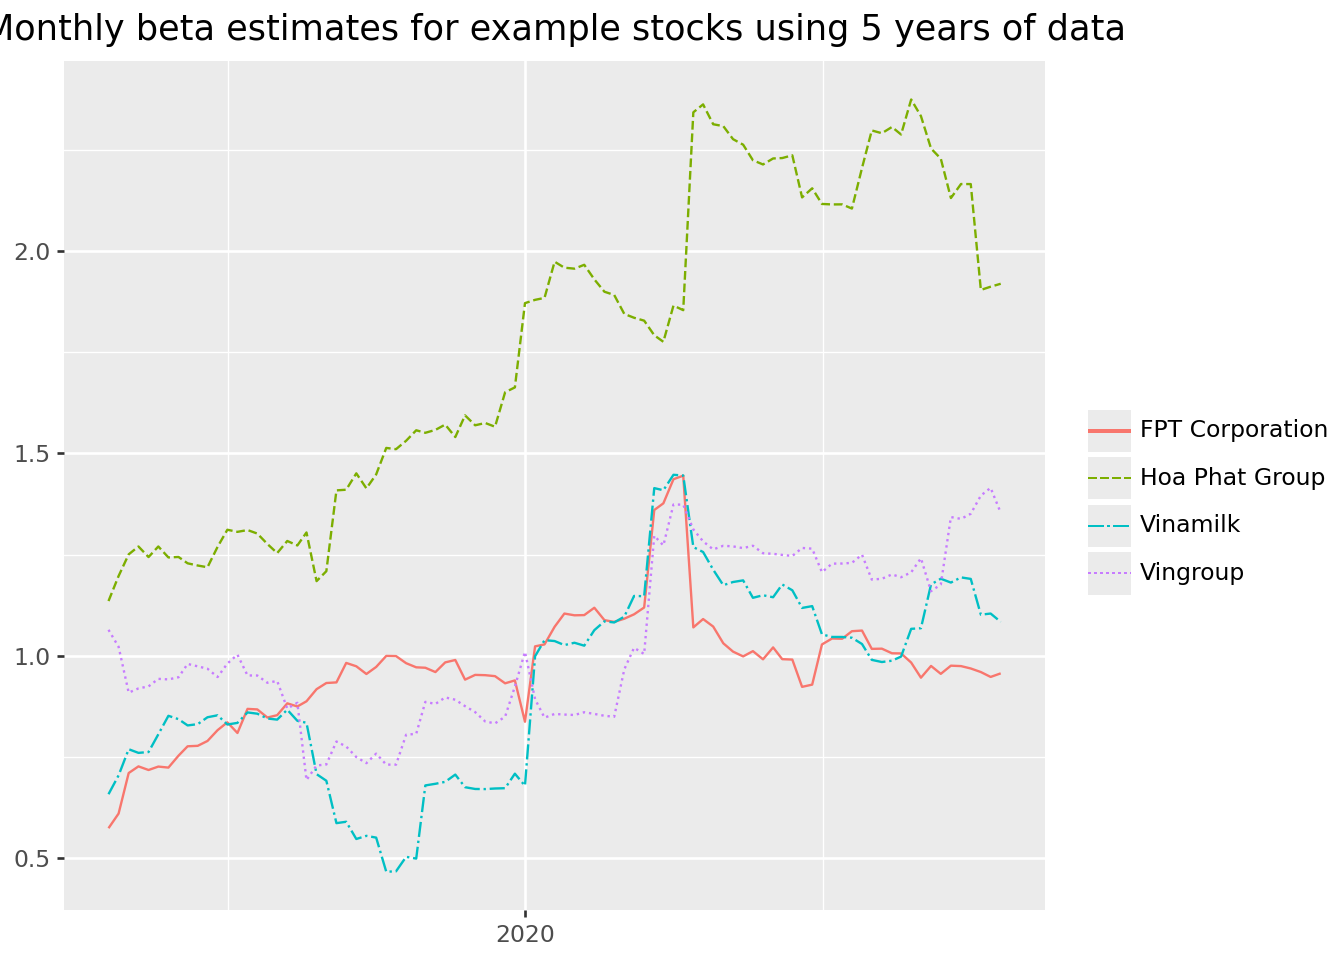

In [12]:
#| label: fig-601
#| fig-cap: The figure shows monthly beta estimates for example stocks using five years of data. The CAPM betas are estimated with monthly data and a rolling window of length five years based on adjusted excess returns from Stock Data.
#| fig-alt: 'Title: Monthly beta estimates for example stocks using five years of data. The figure shows a time series of beta estimates based on five years of monthly data. The estimated betas vary over time and across varies but are always positive for each stock.'
#| fig-pos: htb
beta_examples_sub = capm_examples.merge(examples, how="left", on="symbol").query(
    "coefficient == 'mkt_excess'"
)

beta_figure = (
    ggplot(
        beta_examples_sub,
        aes(x="date", y="estimate", color="company", linetype="company"),
    )
    + geom_line()
    + labs(
        x="",
        y="",
        color="",
        linetype="",
        title="Monthly beta estimates for example stocks using 5 years of data",
    )
    + scale_x_datetime(date_breaks="5 year", date_labels="%Y")
)
beta_figure.show()

In [13]:
n_cores = cpu_count() - 1
n_cores

3

In [14]:
#| eval: false
prices_monthly_nested = (prices_monthly
    .groupby("symbol", group_keys=False)
)

capm_monthly = pd.concat(
    Parallel(n_jobs=n_cores)(
        delayed(
            lambda name, group: roll_capm_estimation(group).assign(symbol=name)
        )(
            name, group
        )
        for name, group in prices_monthly_nested
    )
).get(["symbol", "date", "coefficient", "estimate", "t_statistic"])
capm_monthly

In [15]:
#| output: false
#| eval: false
(capm_monthly
  .to_sql(name="capm_monthly", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

In [16]:
capm_monthly = pd.read_sql_query(
    sql="SELECT * FROM capm_monthly", 
    con=tidy_finance,
    parse_dates={"date"}
)

capm_monthly.head()

,symbol,date,coefficient,estimate,t_statistic
0,A32,2023-10-31,alpha,-0.003802,-0.735962
1,A32,2023-10-31,mkt_excess,0.685640,1.218415
2,A32,2023-11-30,alpha,-0.003740,-0.721261
3,A32,2023-11-30,mkt_excess,0.674715,1.205106
4,A32,2023-12-31,alpha,-0.003796,-0.734142


In [17]:
#| eval: false
factors_ff3_daily = pd.read_sql_query(
  sql="SELECT date, mkt_excess FROM factors_ff3_daily",
  con=tidy_finance,
  parse_dates={"date"}
)

In [18]:
symbols = list(prices_monthly["symbol"].unique().astype(str))

batch_size = 500
batches = np.ceil(len(symbols)/batch_size).astype(int)
min_obs = 1_000

In [19]:
#| eval: false
#| output: false
capm_daily = []

for j in range(1, batches+1):  
    symbol_batch = symbols[
      ((j-1)*batch_size):(min(j*batch_size, len(symbols)))
    ]
    
    symbol_batch_formatted = (
      ", ".join(f"'{symbol}'" for symbol in symbol_batch)
    )
    symbol_string = f"({symbol_batch_formatted})"
    
    prices_daily_sub_query = (
      "SELECT symbol, date, ret_excess "
        "FROM prices_daily "
       f"WHERE symbol IN {symbol_string}" 
    )
      
    prices_daily_sub = pd.read_sql_query(
      sql=prices_daily_sub_query,
      con=tidy_finance,
      dtype={"symbol": int},
      parse_dates={"date"}
    )
    
    prices_daily_sub_nested = (prices_daily_sub
      .merge(factors_ff3_daily, how="inner", on="date")
      .assign(
          date = lambda x: 
            x["date"].dt.to_period("M").dt.to_timestamp()
        )
      .groupby("symbol", group_keys=False)
    )
    
    results = Parallel(n_jobs=n_cores)(
        delayed(
            lambda name, group: roll_capm_estimation(group, min_obs=min_obs).assign(symbol=name)
        )(
            name, group
        )
        for name, group in prices_daily_sub_nested
    )
    
    if results:
        capm_daily_sub = pd.concat(results).get(
            ["symbol", "date", "coefficient", "estimate", "t_statistic"]
        )
        capm_daily.append(capm_daily_sub)
    else:
        print(f"Warning: Batch {j} produced no results (insufficient data)")
              
    print(f"Batch {j} out of {batches} done ({(j/batches)*100:.2f}%)\n")
  
capm_daily = pd.concat(capm_daily)

In [20]:
beta_monthly = (capm_monthly
    .query("coefficient == 'mkt_excess'")
    .get(["symbol", "date", "estimate"])
    .rename(columns={"estimate": "beta"})
    .assign(return_type="monthly")
)

/home/mikenguyen/project/tidyfinance/.venv/lib/python3.13/site-packages/plotnine/layer.py:293: PlotnineWarning: stat_boxplot : Removed 1222 rows containing non-finite values.


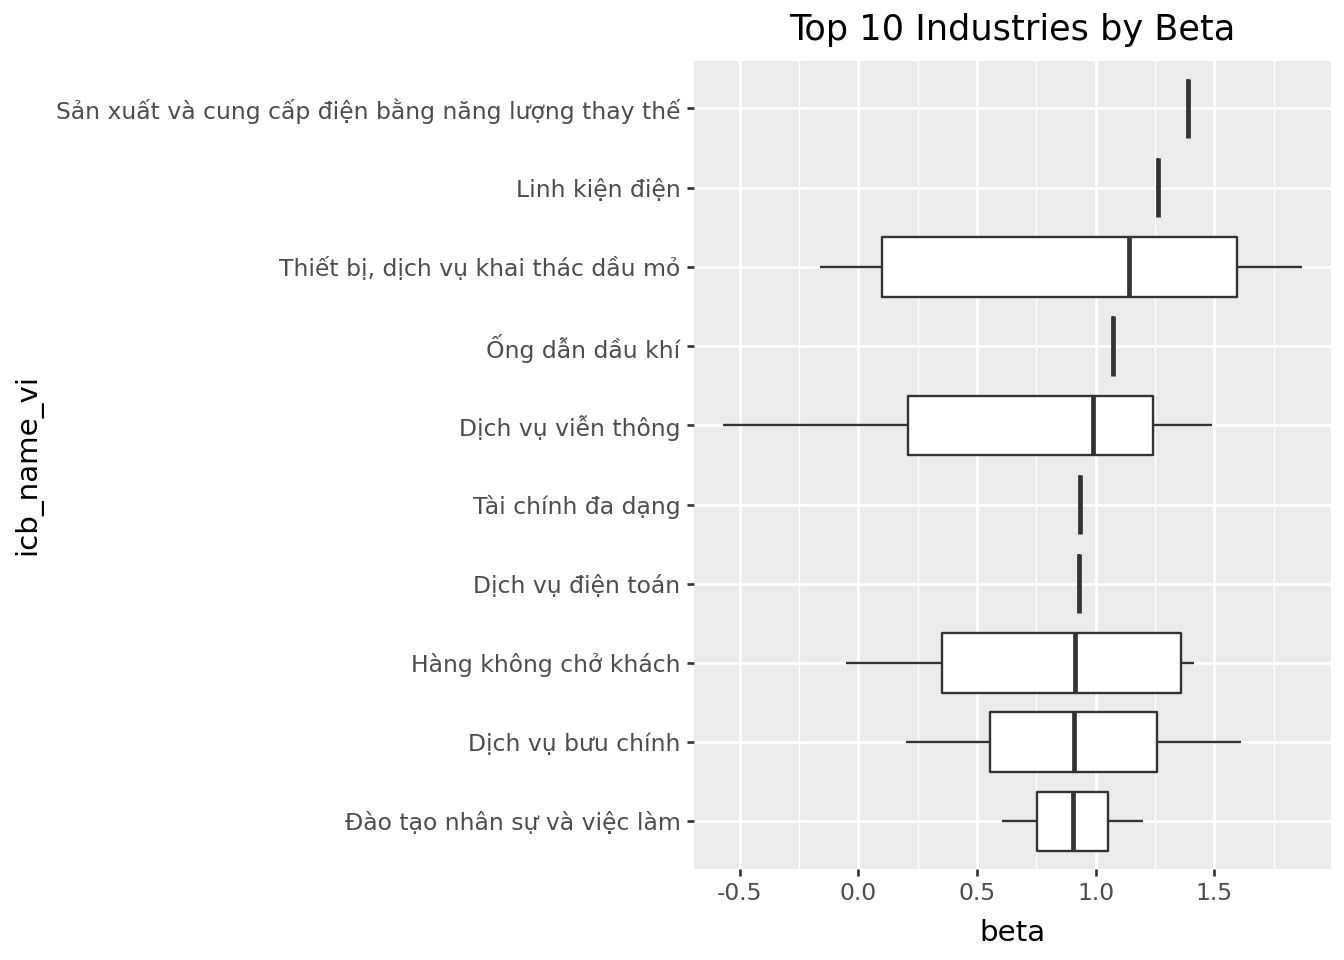

In [21]:
#| label: fig-602
#| fig-cap: The box plots show the average firm-specific beta estimates by industry.
#| fig-pos: htb
beta_industries = (beta_monthly
    .merge(prices_monthly, how="inner", on=["symbol", "date"])
    .dropna(subset="beta")
    .groupby(["icb_name_vi", "symbol"])["beta"]
    .aggregate("mean")
    .reset_index()
)

industry_order = (beta_industries
    .groupby("icb_name_vi")["beta"]
    .aggregate("median")
    .sort_values()
    .index.tolist()
)

# To show the 10 industries with the highest median beta
top_10_industries = industry_order[-10:]

# To show the 10 industries with the lowest median beta
bottom_10_industries = industry_order[:10]

# Update the plot call
beta_industries_figure = (
    ggplot(beta_industries, aes(x="icb_name_vi", y="beta"))
    + geom_boxplot()
    + coord_flip()
    + scale_x_discrete(limits=top_10_industries) # Use the sliced list here
    + labs(title="Top 10 Industries by Beta")
)

# beta_industries_figure = (
#     ggplot(
#         beta_industries, 
#         aes(x="icb_name_vi", y="beta") 
#     )
#     + geom_boxplot()
#     + coord_flip()
#     + labs(
#         x="",
#         y="Beta", 
#         title="Firm-specific beta distributions by industry"
#     )
#     + scale_x_discrete(limits=industry_order)
# )

beta_industries_figure.show()

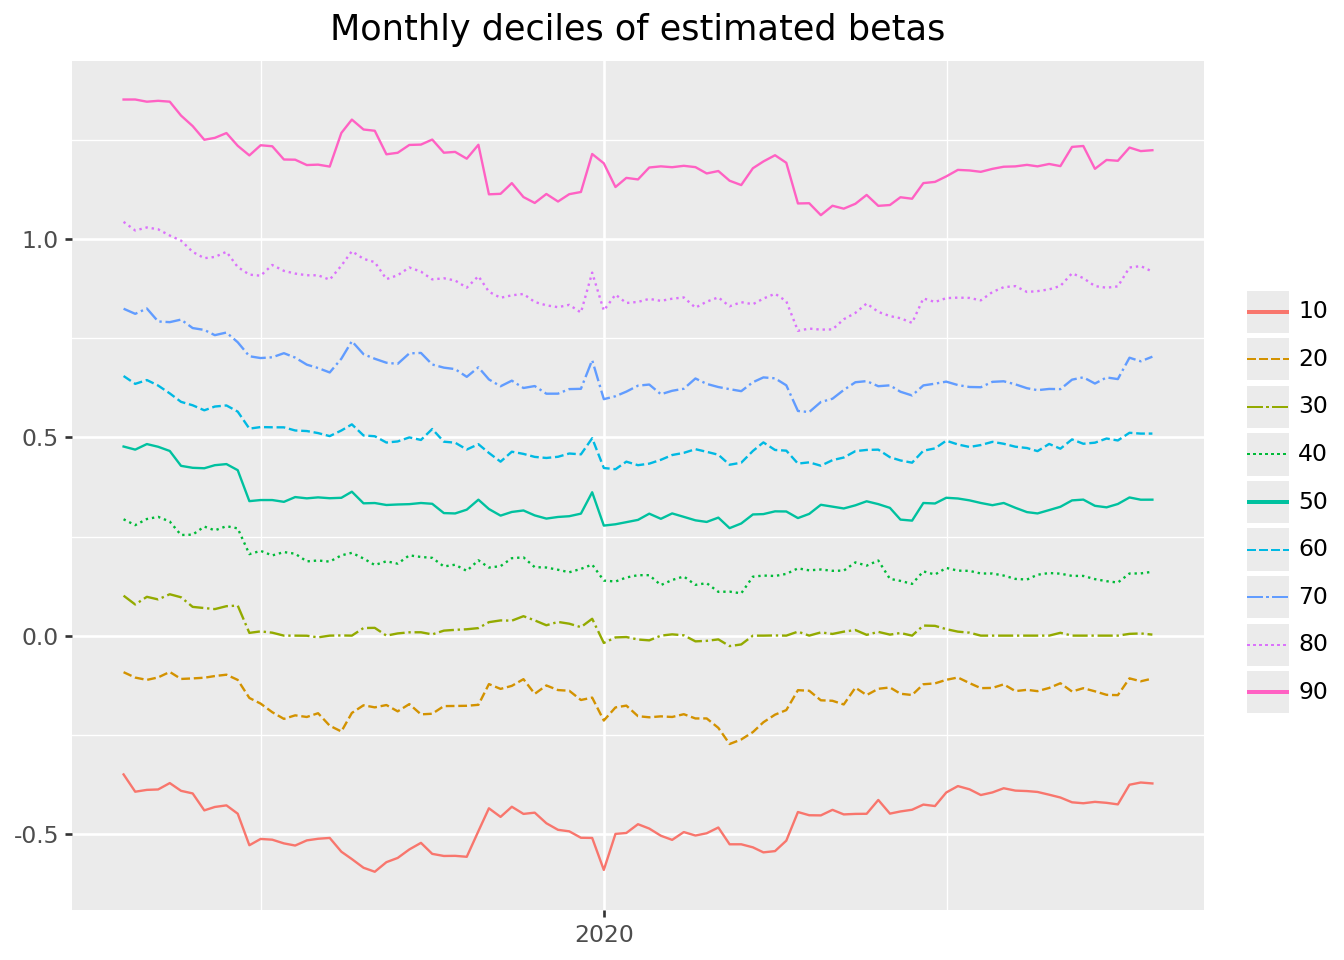

In [22]:
#| label: fig-603
#| fig-cap: The figure shows monthly deciles of estimated betas. Each line corresponds to the monthly cross-sectional quantile of the estimated CAPM beta.
#| fig-alt: 'Title: Monthly deciles of estimated betas. The figure shows time series of deciles of estimated betas to illustrate the distribution of betas over time.'
#| fig-pos: htb
beta_quantiles = (
    beta_monthly.groupby("date")["beta"]
    .quantile(q=np.arange(0.1, 1.0, 0.1))
    .reset_index()
    .rename(columns={"level_1": "quantile"})
    .assign(quantile=lambda x: (x["quantile"] * 100).astype(int))
    .dropna()
)

linetypes = ["-", "--", "-.", ":"]
n_quantiles = beta_quantiles["quantile"].nunique()

beta_quantiles_figure = (
    ggplot(
        beta_quantiles,
        aes(x="date", y="beta", color="factor(quantile)", linetype="factor(quantile)"),
    )
    + geom_line()
    + labs(
        x="", y="", color="", linetype="", title="Monthly deciles of estimated betas"
    )
    + scale_x_datetime(date_breaks="5 year", date_labels="%Y")
    + scale_linetype_manual(
        values=[linetypes[l % len(linetypes)] for l in range(n_quantiles)]
    )
)
beta_quantiles_figure.show()

In [23]:
#| eval: false
beta_daily = (capm_daily
    .query("coefficient == 'mkt_excess'")
    .get(["symbol", "date", "estimate"])
    .rename(columns={"estimate": "beta"})
    .assign(return_type="daily")
)

beta = pd.concat([beta_monthly, beta_daily], ignore_index=True)

In [24]:
#| label: fig-604
#| eval: false
#| fig-cap: The figure shows the comparison of beta estimates using monthly and daily data. CAPM betas are computed using five years of monthly or three months of daily data. The two lines show the monthly estimates based on a rolling window for few exemplary stocks.
#| fig-alt: 'Title: Comparison of beta estimates using monthly and daily data. The figure shows a time series of beta estimates using five years of monthly versus three years of daily data. The estimates based on longer periods of monthly data are smooth relative to the estimates based on daily data. However, the general trend and level is similar, irrespective of the choice of frequency.'
#| fig-pos: h!tb
beta_comparison = beta.merge(examples, how="inner", on="symbol")

beta_comparison_figure = (
    ggplot(
        beta_comparison,
        aes(x="date", y="beta", color="return_type", linetype="return_type"),
    )
    + geom_line()
    + facet_wrap("~company", ncol=1)
    + labs(
        x="",
        y="",
        color="",
        linetype="",
        title="Comparison of beta estimates using monthly and daily data",
    )
    + scale_x_datetime(date_breaks="10 years", date_labels="%Y")
    + theme(figure_size=(6.4, 6.4))
)
beta_comparison_figure.show()

In [25]:
#| eval: false
#| output: false
(beta.to_sql(
  name="beta", 
  con=tidy_finance, 
  if_exists="replace",
  index=False
  )
)

In [26]:
#| label: fig-605
#| eval: false
#| fig-cap: The figure shows end-of-month share of securities with beta estimates. The two lines show the share of securities with beta estimates using five years of monthly or three months of daily data.
#| fig-alt: 'Title: End-of-month share of securities with beta estimates. The figure shows two time series with end-of-year shares of securities with beta estimates using five years of monthly or three months of daily data. There is almost no missing data for the estimates based on daily data. For the beta estimates based on monthly data, around 75 percent of all stock-month combinations provide sufficient long historical periods to estimate the beta.'
#| fig-pos: htb
return_types = pd.DataFrame({"return_type": ["monthly", "daily"]})

beta_coverage = (
    prices_monthly.merge(return_types, how="cross")
    .merge(beta, on=["symbol", "date", "return_type"], how="left")
    .groupby(["date", "return_type"], as_index=False)
    .apply(lambda x: pd.Series({"share": x["beta"].notna().sum() / len(x)}))
)

beta_coverage_figure = (
    ggplot(
        beta_coverage,
        aes(x="date", y="share", color="return_type", linetype="return_type"),
    )
    + geom_line()
    + labs(
        x="",
        y="",
        color="",
        linetype="",
        title="End-of-month share of securities with beta estimates",
    )
    + scale_y_continuous(labels=percent_format())
    + scale_x_datetime(date_breaks="10 year", date_labels="%Y")
)
beta_coverage_figure.show()

In [27]:
#| eval: false
(beta
    .groupby("return_type")["beta"]
    .describe()
    .round(2)
)

In [28]:
#| eval: false
(beta
    .pivot_table(index=["symbol", "date"], columns="return_type", values="beta")
    .reset_index()
    .get(["monthly", "daily"])
    .corr()
    .round(2)
)